## **Installation java et spark**


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [ ]:
import findspark
findspark.init()

# **Connection google drive**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exemples Spark Sql**

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-11-16 13:33:22--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.2’

ngrok-stable-linux- 100%[===================>]  13.19M  53.1MB/s    in 0.2s    

2021-11-16 13:33:23 (53.1 MB/s) - ‘ngrok-stable-linux-amd64.zip.2’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
{"tunnels":[{"name":"command_line","uri":"/api/tunnels/command_line","public_url":"https://ce9f-34-73-41-245.ngrok.io","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":2,"gauge":0,"rate1":0.000014973308430835861,"rate5":0.00142684382

**Exemple 1 : Bank**

In [ ]:
## Spark Context
from pyspark import SparkContext
from pyspark.sql import SQLContext

sc =SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
df_b = sqlContext.read.csv('drive/My Drive/Colab_data/cours_spark/bank.csv',header=True)


/content/spark-3.2.0-bin-hadoop3.2/python/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
df_b.printSchema()

root
 |-- age: string (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- balance: string (nullable = true)



In [ ]:
## Spark Session
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
bank = spark.read.csv('drive/My Drive/Colab_data/cours_spark/bank.csv',header=True)
#sqlContext = SQLContext(sc) # Initialize SQLContext
bank.printSchema()

root
 |-- age: string (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- balance: string (nullable = true)



In [ ]:
bank.createOrReplaceTempView("bank_data") # Enregistrement sous forme de table
affich_bank = spark.sql("SELECT count(*) nbr,job FROM bank_data group by job") # Utilisation du SQL classique
affich_bank.show(4)

+---+-------------+
|nbr|          job|
+---+-------------+
|969|   management|
|230|      retired|
| 38|      unknown|
|183|self-employed|
+---+-------------+
only showing top 4 rows



<Figure size 432x288 with 0 Axes>

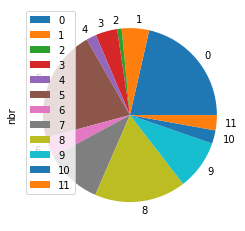

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.clf()
pdDF = affich_bank.toPandas()
pdDF.plot(x='job', y='nbr', kind='pie')#bar, hist

**Exemple 2 : black friday**

In [ ]:
#inferSchema permet de detecter les types des données
dfs = spark.read.csv('drive/My Drive/Colab_data/cours_spark/black_friday.csv',header=True, inferSchema=True)

In [ ]:
dfs.printSchema() # afficher le schema 

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



In [ ]:
dfs.show(3)

+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F|0-17|        10|            A|                         2|             0|                 3|              null|              null|    8370|
|1000001| P00248942|     F|0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F|0-17|        10|            A|                         2|             0|                12|              null|              null|    1422|
+---

In [ ]:
dfs.count()

550068

In [ ]:
dfs.select("User_ID","Gender","Age","Occupation").show(5)

+-------+------+----+----------+
|User_ID|Gender| Age|Occupation|
+-------+------+----+----------+
|1000001|     F|0-17|        10|
|1000001|     F|0-17|        10|
|1000001|     F|0-17|        10|
|1000001|     F|0-17|        10|
|1000002|     M| 55+|        16|
+-------+------+----+----------+
only showing top 5 rows



In [ ]:
dfs.select("City_Category").distinct().show()

+-------------+
|City_Category|
+-------------+
|            B|
|            C|
|            A|
+-------------+



In [ ]:
#Les categories de produit achetées par les femmes
dfs.filter(dfs.Gender == 'F').select("Product_Category_1").distinct().show()

+------------------+
|Product_Category_1|
+------------------+
|                12|
|                 1|
|                13|
|                 6|
|                16|
|                 3|
|                20|
|                 5|
|                19|
|                15|
|                 9|
|                17|
|                 4|
|                 8|
|                 7|
|                10|
|                11|
|                14|
|                 2|
|                18|
+------------------+



In [ ]:
#Total des ventes par city_category
dfs.groupBy("City_Category").sum("Purchase").show()

+-------------+-------------+
|City_Category|sum(Purchase)|
+-------------+-------------+
|            B|   2115533605|
|            C|   1663807476|
|            A|   1316471661|
+-------------+-------------+



In [ ]:
#Total des ventes par city_category pour les femmes
dfs.filter(dfs.Gender == 'F').groupBy("City_Category").sum("Purchase").show()

+-------------+-------------+
|City_Category|sum(Purchase)|
+-------------+-------------+
|            B|    493617008|
|            C|    386285719|
|            A|    306329915|
+-------------+-------------+



In [ ]:
#Remplacer les valeurs nulles
dfs_modif = dfs.fillna({'Product_Category_2':0, 'Product_Category_3':0})
dfs_modif.show(3)

+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F|0-17|        10|            A|                         2|             0|                 3|                 0|                 0|    8370|
|1000001| P00248942|     F|0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F|0-17|        10|            A|                         2|             0|                12|                 0|                 0|    1422|
+---

In [ ]:
dfs_modif.write.csv("drive/My Drive/Colab_data/cours_spark/dfs_modif")

In [ ]:
dfs_modif.rdd.getNumPartitions()

NameError: ignored

**Exemple 3 : Fichier sans entête**





In [ ]:
DFpeople = sqlContext.read.csv('drive/My Drive/Colab_data/cours_spark/people.csv')
DFpeople.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)



In [ ]:
from pyspark.sql import Row

myDF = sc.textFile("drive/My Drive/Colab_data/cours_spark/people.csv") \
         .map(lambda l: l.split(",")) \
         .map(lambda l: Row(ID=int(l[0]), name=l[1], age=int(l[2]), sex=l[3], height=int(l[4]))) \
         .toDF()

In [ ]:
myDF.printSchema()

root
 |-- ID: long (nullable = true)
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)
 |-- sex: string (nullable = true)
 |-- height: long (nullable = true)



In [ ]:
myDF.createOrReplaceTempView("myDF_tab")

sqlContext.sql("SELECT sex, AVG(height) AS avgheight FROM myDF_tab WHERE age > 21 GROUP BY sex").show()

NameError: ignored

In [ ]:
myDF.filter('age > 21').groupBy('sex').mean('height').show()

+---------+-----------+
|      sex|avg(height)|
+---------+-----------+
| "female"|      169.0|
|   "male"|      170.0|
+---------+-----------+

